# Prepare Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
#train_data.info()
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Checking for missing values
missing_values_df = df.isnull().sum()
missing_values_df = missing_values_df[missing_values_df >0].sort_values(ascending=False)

print(missing_values_df)

bmi    201
dtype: int64


In [ ]:
df=df.dropna()
df=df.drop(columns=["id"])
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


<ipython-input-89-e0bb1d663b0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_stroke = df.corr()['stroke'].sort_values(ascending=False)


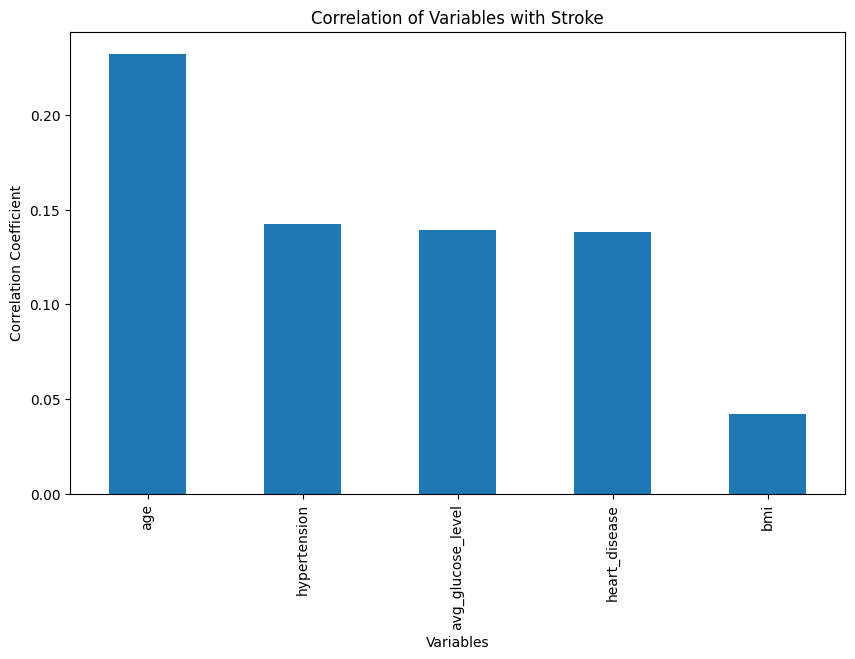

In [ ]:
correlation_with_stroke = df.corr()['stroke'].sort_values(ascending=False)
correlation_with_stroke

plt.figure(figsize=(10, 6))
correlation_with_stroke.drop('stroke').plot(kind='bar')
plt.title('Correlation of Variables with Stroke')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()

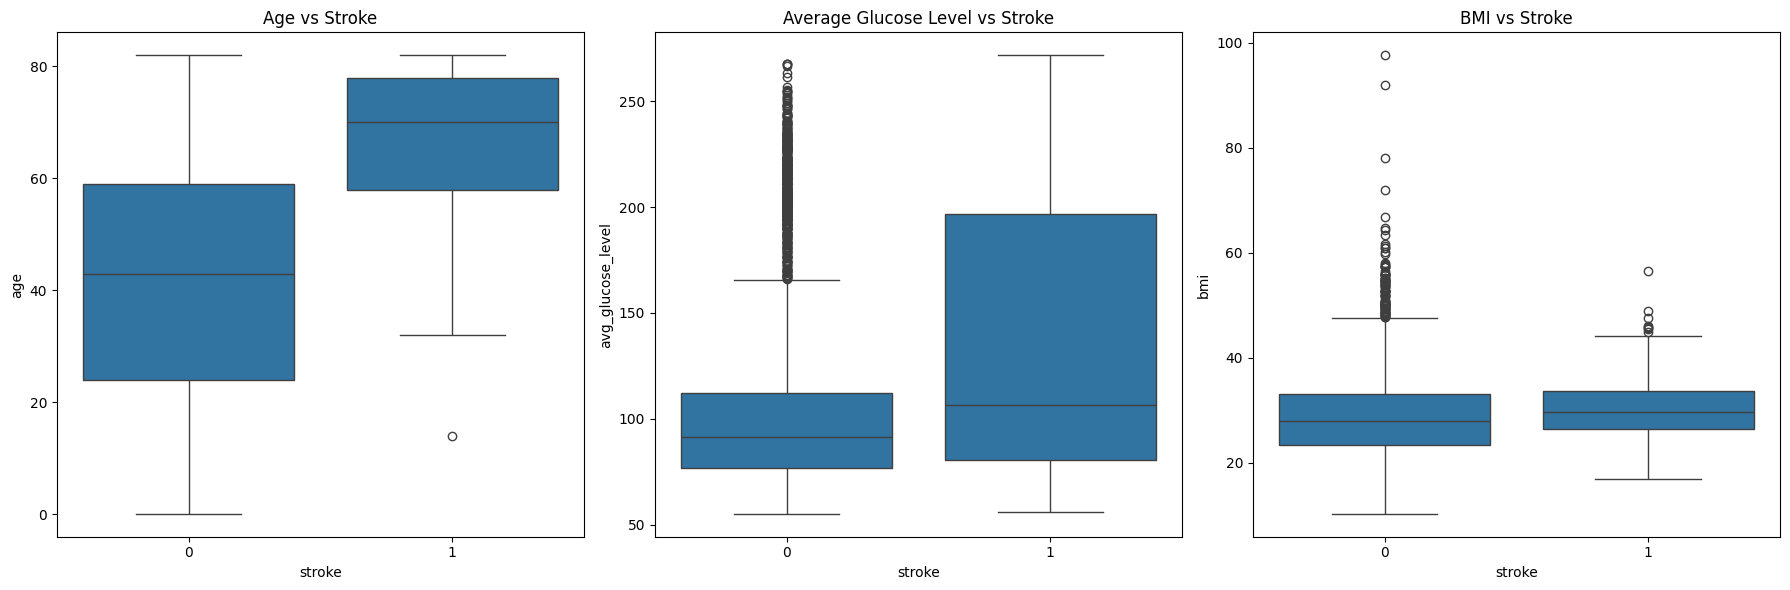

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x='stroke', y='age', data=df, ax=axes[0])
axes[0].set_title('Age vs Stroke')

sns.boxplot(x='stroke', y='avg_glucose_level', data=df, ax=axes[1])
axes[1].set_title('Average Glucose Level vs Stroke')

sns.boxplot(x='stroke', y='bmi', data=df, ax=axes[2])
axes[2].set_title('BMI vs Stroke')

plt.tight_layout()
plt.show()

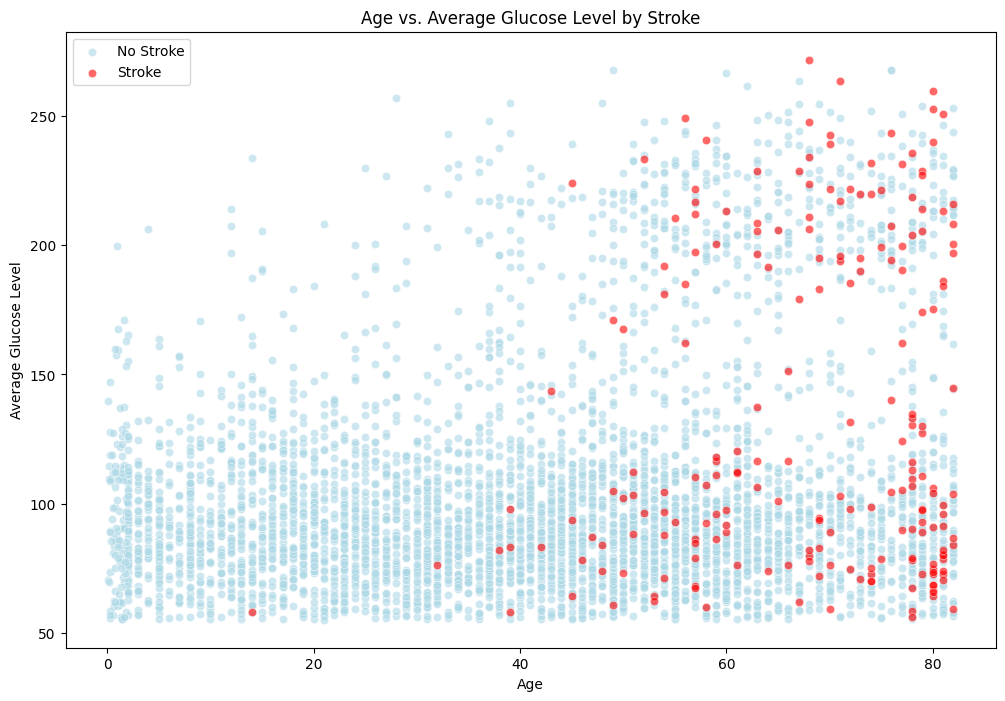

In [ ]:

plt.figure(figsize=(12, 8))

sns.scatterplot(x=df[df['stroke'] == 0]['age'],
                y=df[df['stroke'] == 0]['avg_glucose_level'],
                label='No Stroke',
                color='lightblue',
                alpha=0.6)

sns.scatterplot(x=df[df['stroke'] == 1]['age'],
                y=df[df['stroke'] == 1]['avg_glucose_level'],
                label='Stroke',
                color='red',
                alpha=0.6)

plt.title('Age vs. Average Glucose Level by Stroke')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend()

plt.show()


(               age  hypertension  heart_disease  avg_glucose_level  \
 count  4908.000000   4908.000000    4908.000000        4908.000000   
 mean     42.868810      0.091891       0.049511         105.297402   
 std      22.556128      0.288901       0.216954          44.425550   
 min       0.080000      0.000000       0.000000          55.120000   
 25%      25.000000      0.000000       0.000000          77.067500   
 50%      44.000000      0.000000       0.000000          91.680000   
 75%      60.000000      0.000000       0.000000         113.495000   
 max      82.000000      1.000000       1.000000         271.740000   
 
               bmi       stroke  
 count  4908.00000  4908.000000  
 mean     28.89456     0.042584  
 std       7.85432     0.201937  
 min      10.30000     0.000000  
 25%      23.50000     0.000000  
 50%      28.10000     0.000000  
 75%      33.10000     0.000000  
 max      97.60000     1.000000  ,
 gender            2
 ever_married      2
 work_type

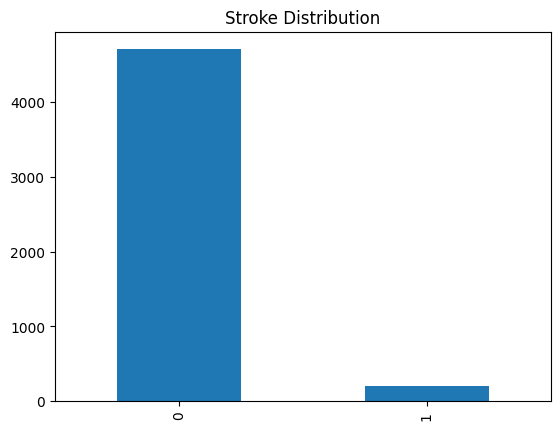

In [ ]:
numerical_summary = df.describe()

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = df[categorical_columns].nunique()


stroke_distribution = df['stroke'].value_counts()

numerical_summary, categorical_summary, stroke_distribution.plot(kind='bar'), plt.title('Stroke Distribution')

<ipython-input-93-a6ec3470625e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


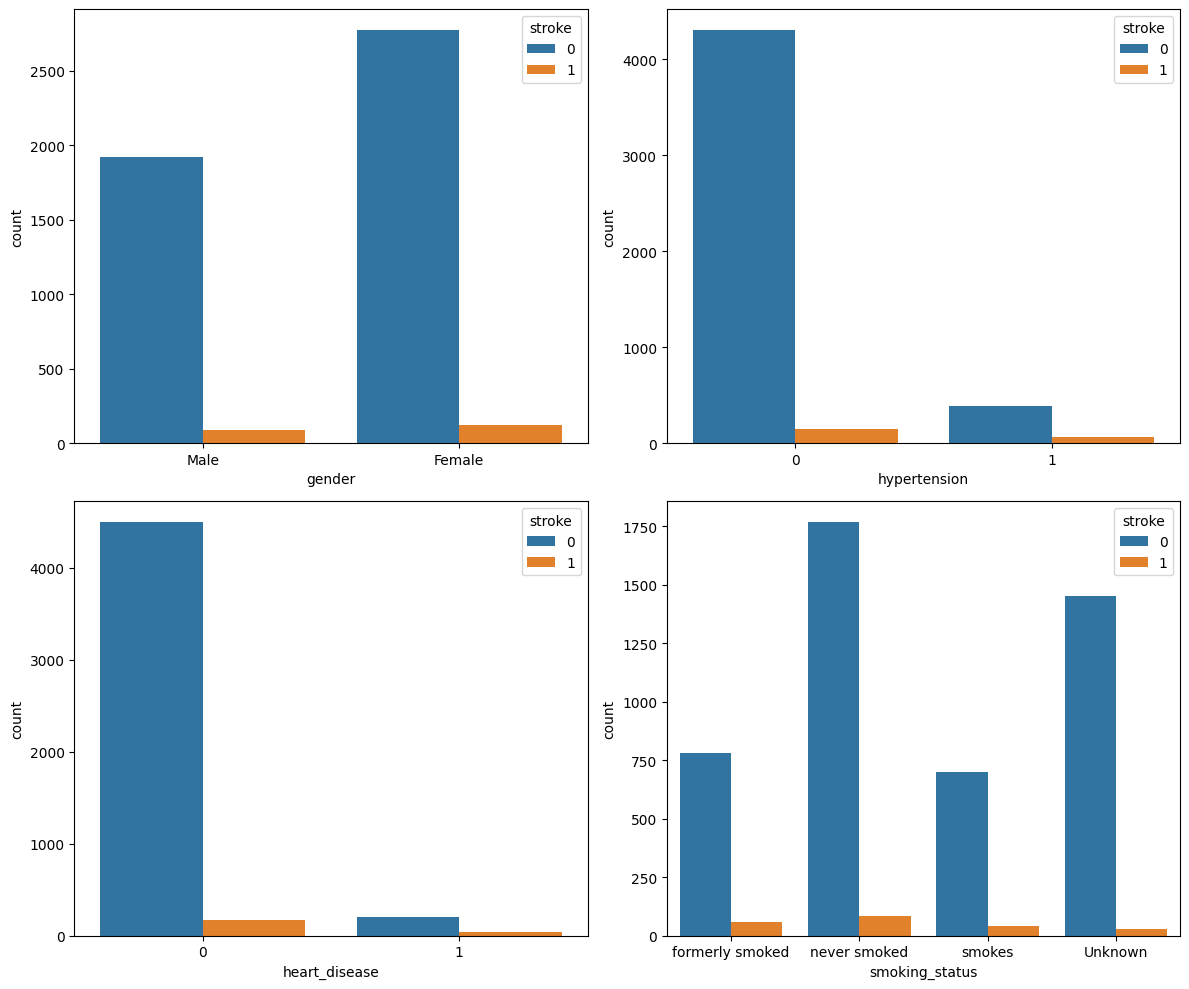

In [ ]:
correlation_matrix = df.corr()

# Stroke rate by key categorical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='gender', hue='stroke', data=df, ax=axes[0, 0])
sns.countplot(x='hypertension', hue='stroke', data=df, ax=axes[0, 1])
sns.countplot(x='heart_disease', hue='stroke', data=df, ax=axes[1, 0])
sns.countplot(x='smoking_status', hue='stroke', data=df, ax=axes[1, 1])

# Adjusting layout
plt.tight_layout()



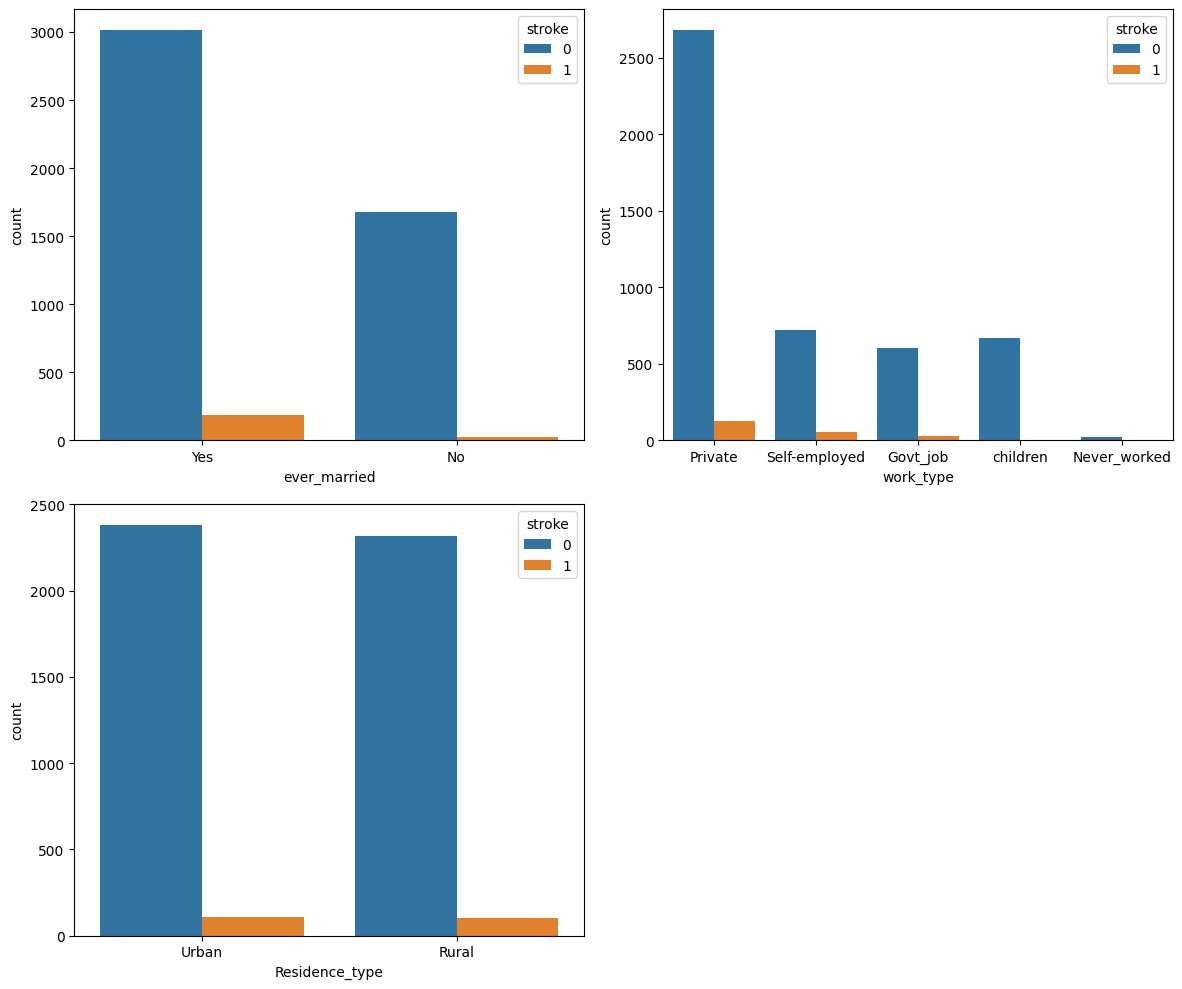

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='ever_married', hue='stroke', data=df, ax=axes[0, 0])
sns.countplot(x='work_type', hue='stroke', data=df, ax=axes[0, 1])
sns.countplot(x='Residence_type', hue='stroke', data=df, ax=axes[1, 0])

fig.delaxes(axes[1][1])
plt.tight_layout()

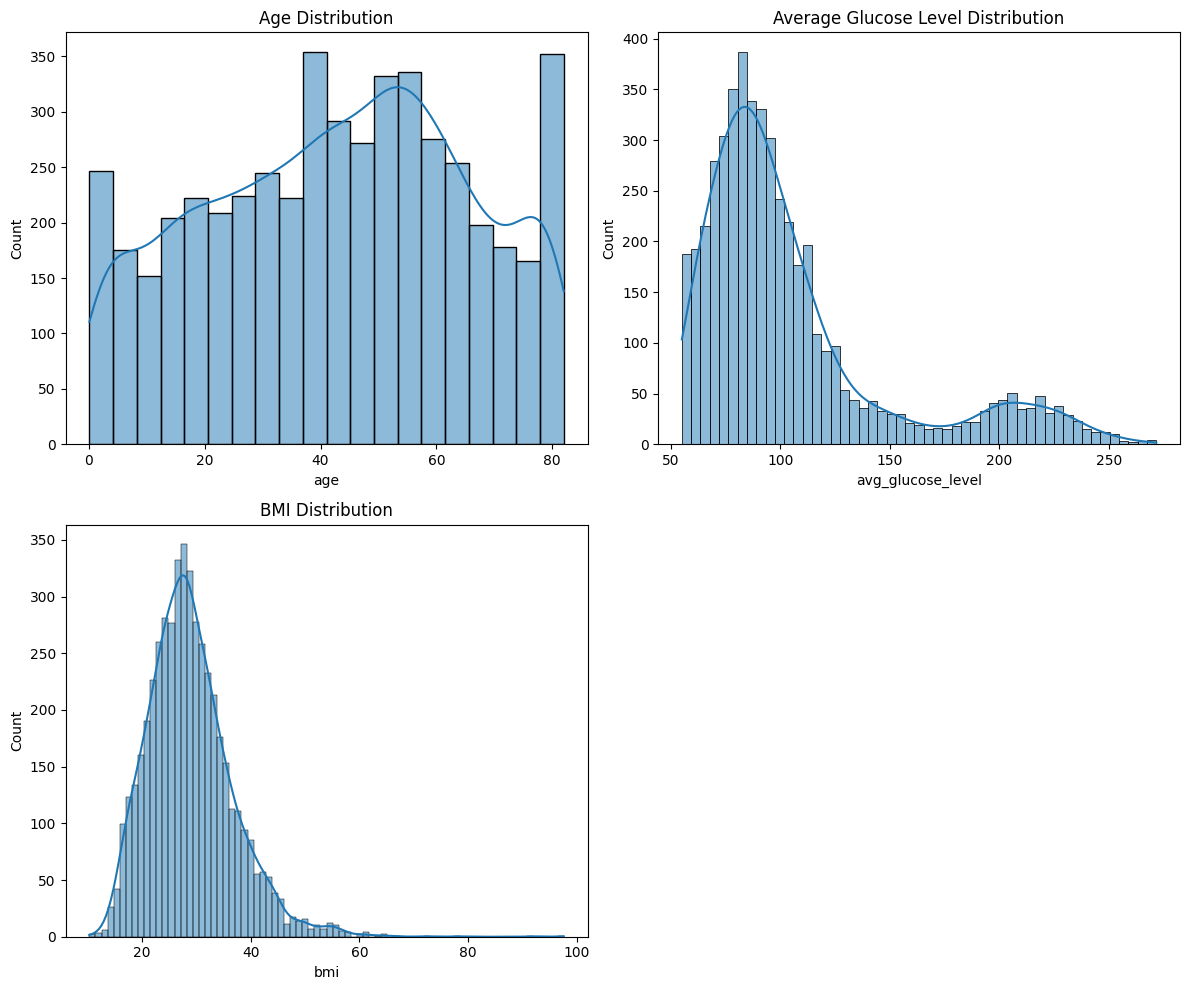

In [ ]:
# Distribution plots for key numerical variables

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')


sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Average Glucose Level Distribution')


sns.histplot(df[df['bmi'].notnull()]['bmi'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('BMI Distribution')

fig.delaxes(axes[1][1])
plt.tight_layout()
plt.show()

## Feature Engineering


In [ ]:
df['d_gender'] = df['gender'].map({'Male': 0, 'Female': 1})

df['d_ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

df['d_Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,d_gender,d_ever_married,d_Residence_type
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1,0
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Creating Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 45, 60, np.inf], labels=['Child', 'Adult', 'Senior Adult', 'Elderly'])

# 2. Categorizing BMI
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30)
]
choices = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = np.select(conditions, choices)

# 3. Transforming avg_glucose_level
df['log_avg_glucose_level'] = np.log(df['avg_glucose_level'])

# 4. Data Scaling for 'age', 'avg_glucose_level', 'bmi'
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Displaying the first few rows of the modified dataframe
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,d_gender,d_ever_married,d_Residence_type,age_group,bmi_category,log_avg_glucose_level
0,Male,1.069938,0,1,Yes,Private,Urban,2.777797,0.981145,formerly smoked,1,0,1,1,Elderly,Obese,5.432367
2,Male,1.646336,0,1,Yes,Private,Rural,0.014016,0.459086,never smoked,1,0,1,0,Elderly,Obese,4.662684
3,Female,0.271847,0,0,Yes,Private,Urban,1.484266,0.701016,smokes,1,1,1,1,Senior Adult,Obese,5.143008
4,Female,1.601998,1,0,Yes,Self-employed,Rural,1.549325,-0.623231,never smoked,1,1,1,0,Elderly,Normal,5.159745
5,Male,1.690675,0,0,Yes,Private,Urban,1.821493,0.013426,formerly smoked,1,0,1,1,Elderly,Overweight,5.226875


In [ ]:
# Encoding the categorical variables that are not yet encoded
le_work_type = LabelEncoder()
df['d_work_type'] = le_work_type.fit_transform(df['work_type'])

le_smoking_status = LabelEncoder()
df['d_smoking_status'] = le_smoking_status.fit_transform(df['smoking_status'])

le_age_group = LabelEncoder()
df['d_age_group'] = le_age_group.fit_transform(df['age_group'])

le_bmi_category = LabelEncoder()
df['d_bmi_category'] = le_bmi_category.fit_transform(df['bmi_category'])

# Dropping the original categorical columns
df.drop(['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status', 'age_group', 'bmi_category'], axis=1, inplace=True)

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,d_gender,d_ever_married,d_Residence_type,log_avg_glucose_level,d_work_type,d_smoking_status,d_age_group,d_bmi_category
0,1.069938,0,1,2.777797,0.981145,1,0,1,1,5.432367,2,1,2,1
2,1.646336,0,1,0.014016,0.459086,1,0,1,0,4.662684,2,2,2,1
3,0.271847,0,0,1.484266,0.701016,1,1,1,1,5.143008,2,3,3,1
4,1.601998,1,0,1.549325,-0.623231,1,1,1,0,5.159745,3,2,2,0
5,1.690675,0,0,1.821493,0.013426,1,0,1,1,5.226875,2,1,2,2


# Spliting dataset into features and target

In [ ]:
# Split the dataset into features and target
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9511201629327902
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.50      0.01      0.03        72

    accuracy                           0.95      1473
   macro avg       0.73      0.51      0.50      1473
weighted avg       0.93      0.95      0.93      1473



# Model 2

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.9035980991174474
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1401
           1       0.07      0.08      0.08        72

    accuracy                           0.90      1473
   macro avg       0.51      0.51      0.51      1473
weighted avg       0.91      0.90      0.91      1473



# Model 3

In [ ]:
# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9511201629327902
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 4

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.8438560760353021
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1401
           1       0.17      0.54      0.25        72

    accuracy                           0.84      1473
   macro avg       0.57      0.70      0.58      1473
weighted avg       0.93      0.84      0.88      1473



# Important Factors

In [ ]:
# Random Forest Getting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to display feature importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame based on feature importance
features_df.sort_values(by='Importance', ascending=False, inplace=True)

features_df

,Feature,Importance
3,avg_glucose_level,0.202128
8,log_avg_glucose_level,0.200854
4,bmi,0.165865
0,age,0.164762
10,d_smoking_status,0.058928
9,d_work_type,0.044326
5,d_gender,0.027693
7,d_Residence_type,0.027436
12,d_bmi_category,0.027383
11,d_age_group,0.025154


In [ ]:
# Decision Trees Getting feature importances from the Decision Tree
dt_feature_importances = dt_model.feature_importances_

# Creating a DataFrame to display feature importance for the Decision Tree
dt_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importances
})

# Sorting the DataFrame based on feature importance
dt_features_df.sort_values(by='Importance', ascending=False, inplace=True)

dt_features_df

,Feature,Importance
8,log_avg_glucose_level,0.194324
3,avg_glucose_level,0.181727
0,age,0.180550
4,bmi,0.170713
10,d_smoking_status,0.066891
5,d_gender,0.050068
2,heart_disease,0.032575
7,d_Residence_type,0.032028
9,d_work_type,0.031128
12,d_bmi_category,0.022650


In [ ]:
# SVM Important Factors
svm_coefficients = svm_model.coef_[0]  # Assuming binary classification for simplicity
svm_feature_importance = np.abs(svm_coefficients)

# Create a DataFrame for visualization
svm_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': svm_feature_importance
})

# Sort the features by importance
svm_features_df.sort_values(by='Importance', ascending=False, inplace=True)

svm_features_df

,Feature,Importance
8,log_avg_glucose_level,1.853449e-03
3,avg_glucose_level,5.352494e-04
11,d_age_group,7.372047e-05
1,hypertension,4.631175e-05
12,d_bmi_category,2.881885e-05
4,bmi,2.421976e-05
10,d_smoking_status,1.293128e-05
5,d_gender,1.209451e-05
2,heart_disease,1.092348e-05
9,d_work_type,9.241129e-06


In [ ]:
# Naive Bayes Important Factors
from sklearn.naive_bayes import GaussianNB

# Building the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Assuming a binary classification for simplicity, with classes 0 and 1
theta_0 = nb_model.theta_[0]  # Mean of each feature for class 0
theta_1 = nb_model.theta_[1]  # Mean of each feature for class 1

# Calculating the absolute difference in means between the classes
abs_diff_means = np.abs(theta_0 - theta_1)

# Creating a DataFrame to display the absolute difference in means
nb_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'AbsDiffMean': abs_diff_means
})

nb_features_df.sort_values(by='AbsDiffMean', ascending=False, inplace=True)

nb_features_df

,Feature,AbsDiffMean
0,age,1.114712
11,d_age_group,0.820378
3,avg_glucose_level,0.707750
6,d_ever_married,0.262621
10,d_smoking_status,0.255997
8,log_avg_glucose_level,0.220600
4,bmi,0.214517
9,d_work_type,0.209047
1,hypertension,0.192169
2,heart_disease,0.138212
